In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Introduction to Simulation-Based Inference

Until the advent of powerful and accessible computing methods, experimenters often faced a challenging dilemma. They had to either:
1. Describe an accurate model of a phenomenon, which usually made computing explicit answers infeasible, or
2. Choose a simplified standard model that allowed for computation but may not realistically represent the phenomenon.

This dilemma is prevalent across various fields such as electrical engineering, aeronautics, biology, network studies, and astronomy. To address the limitations of traditional methods, researchers in these fields developed customized approaches to model fitting tailored to their specific problems. For instance, physicists pioneered **Markov chain Monte Carlo methods** to address these challenges. However, traditional numerical analysis techniques are often ill-suited for such scenarios.

In this chapter, we explore statistical models and procedures that have driven the development of simulation-based inference. The first section introduces statistical models, followed by sections discussing various statistical methods, with an emphasis on computational difficulties associated with each method. The final section covers deterministic numerical analysis techniques.

## 1.1 Statistical Models

In purely statistical setups, computational challenges arise both at the level of probabilistic modeling of the phenomenon and at the level of statistical inference (e.g., estimation, prediction, testing, variable selection).

### Censored Data Models

Censored data models present missing data scenarios where densities are not directly observed. Analyzing censored data models


# Complex Statistical Models and Simulation-Based Inference

In some cases, developing a detailed representation of the causes behind a phenomenon, such as including explanatory variables, can result in a probabilistic structure that is **too complex for parametric modeling**. This complexity prevents obtaining closed-form estimates for quantities of interest. Such scenarios are common in **expert systems** in fields like medicine, physics, and finance, as well as in **graphical models** used in complex probabilistic frameworks (e.g., Pearl (1988), Robert (1991), Spiegelhalter et al. (1993), Lauritzen (1996)).

Another example is **latent variable models** in econometrics, where even simple models can evolve into highly complex forms when certain variables are aggregated or removed. In these situations, simulation methods become necessary to perform inference. A popular estimation technique for latent variable models is the **Expectation-Maximization (EM) algorithm** (Dempster et al., 1977), which is discussed in Chapter 3.

### Example: Censored Data Models

Censored data models illustrate common missing data scenarios. In these models, densities are not sampled directly, requiring complex computations that generally prevent analytical solutions.

In a basic statistical model, we would observe random variables $ Y_1, Y_2, \ldots, Y_n $, independently drawn from a population with distribution $ f(y; \theta) $. The sample distribution would be expressed as:

$$
\prod_{i=1}^{n} f(y_i; \theta)
$$

Inference about $ \theta $ relies on this distribution.

However, in fields such as medical statistics, **censored random variables** frequently appear. Instead of observing $ Y_i $, we observe $ Y_i^* = \min(Y_i, u) $, where $ u $ is a constant (e.g., maximum observation time). For instance, if $ Y $ is a patient’s survival time in a study limited to $ u = 5 $ years, survival times beyond 5 years are censored at $ u $, making sample density evaluation more challenging.

### Types of Censoring

The relation between censored data and an unobserved model $ Y_i \sim f(\theta) $ defines different types of censoring:

1. **Truncation**: We observe $ Y^* = \min(Y, u) $, where $ u $ is the maximum observation duration or the lowest measurable concentration.
2. **Inclusion Probability**: Original variables $ Y $ remain in the sample with probability $ p(y) $, with the count of censored variables either known or unknown.
3. **Auxiliary Variables**: Observations $ Y $ are linked with auxiliary variables $ X $, so that $ Y = h(Y, T) $, where $ h(Y, x) = \min(Y, x) $.

---

This introduction highlights the necessity of simulation-based methods in statistical analysis where direct, closed-form solutions are impractical due to model complexity.

## Censored Observations and Truncated Data Distributions

### Types of Censoring and Truncation

Censoring in data occurs when observations are only partially known, often due to limits in measurement or study duration. Below are key types of censoring based on truncated observations.

1. **Truncation at a Point $ u $:**
   Given random variables $ Y_1 $ (e.g., times of observation or concentrations), actual observations $ Y $ are:

   $$
   Y = \min(Y_1, u)
   $$

   where $ u $ is the truncation point, such as maximum observation duration or smallest measurable concentration.

2. **Selective Sampling with Probability $ p(y) $:**
   Original variables $ Y_i $ are retained in the sample with probability $ p(y_i) $, and the count of censored observations may be either known or unknown.

3. **Auxiliary Variable Association:**
   Observations $ Y_i $ are linked with auxiliary variables $ X_i $ by a function $ y = h(Y_i, T_i) $, typically using:

   $$
   h(Y, X) = \min(Y, X)
   $$

   The knowledge of truncation, \( I(Y > X) \), may be available or unknown.

### Example: Distribution with Normal Variables

Suppose $ X \sim N(0, \sigma^2) $ and $ Y \sim N(\mu, \tau^2) $. Then, for the censored variable $ Z = X \wedge Y = \min(X, Y) $, the distribution of $ Z $ is given by:

$$
f_Z(z) = \phi(z; \mu, \tau) \Phi\left(\frac{z - \mu}{\sigma}\right) + \left[1 - \Phi\left(\frac{z - \mu}{\sigma}\right)\right] \cdot \phi(z; 0, \sigma)
$$

where:
- $ \phi $ is the **density of the standard normal** distribution $ N(0, 1) $,
- $ \Phi $ is the **cumulative distribution function (CDF)** of the normal distribution.

This computation can be complex for arbitrary values of $ z $.

### Example: Weibull Distributed Variable

For $ X $ with a **Weibull distribution** with parameters $ \alpha $ and $ \beta $, the density function is:

$$
f(x) = \alpha \beta x^{\alpha - 1} e^{-\beta x}
$$

For the censored variable $ Z = X \wedge w $, with constant $ w $, the density is:

$$
f_Z(z) = \alpha \beta z^{\alpha - 1} e^{-\beta z} I(z < w) + \left(1 - \Phi(w)\right) \delta(z - w)
$$

where $ \delta(z) $ is the **Dirac delta function** representing the probability mass at $ w $. This form of distribution is commonly used in **quality control** and **longitudinal studies**.

### Computational Challenges in Censored Data

For large samples $ (X_1, X_2, \dots, X_n) $, the additive structure of the density may prevent efficient computation. Here, “explicit” means **computable in reasonable time**, a requirement not met for complex models.



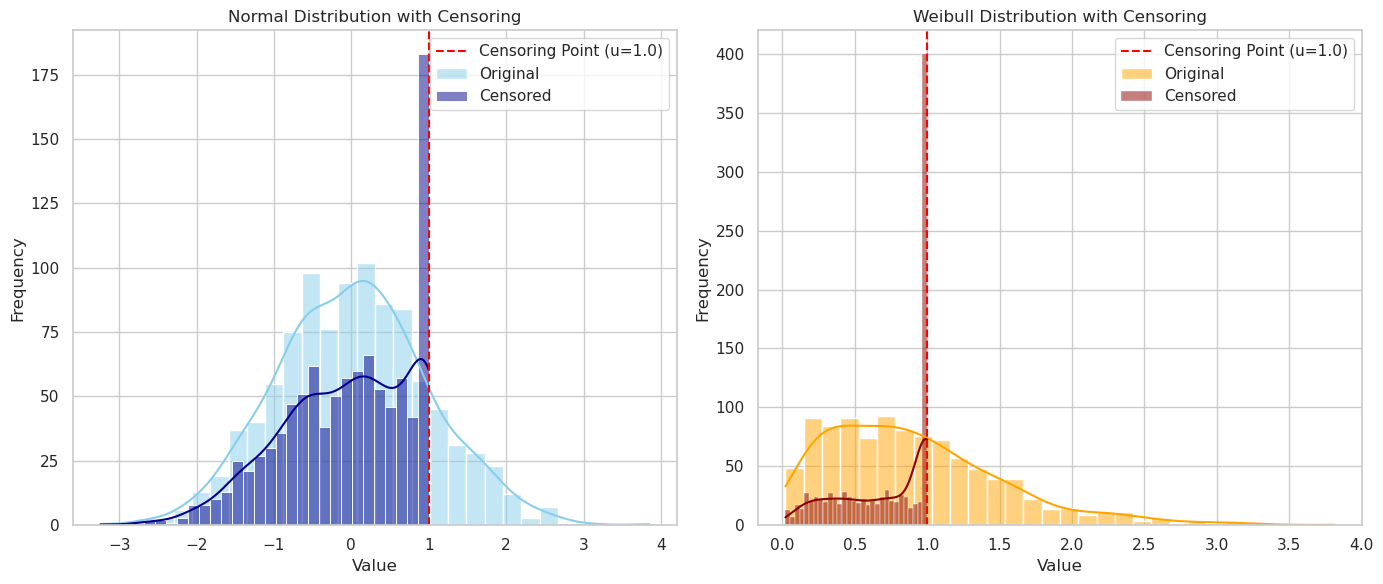

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Set style for plots
sns.set(style="whitegrid")

# Parameters for distributions
mu, sigma = 0, 1  # Mean and standard deviation for the normal distribution
alpha, beta = 1.5, 1  # Shape and scale for Weibull distribution
u = 1.0  # Truncation point for both distributions

# Function to censor data at point `u`
def censor_data(data, u):
    return np.minimum(data, u)

# Generate data from normal and Weibull distributions
np.random.seed(42)  # For reproducibility
normal_data = np.random.normal(mu, sigma, 1000)
weibull_data = np.random.weibull(alpha, 1000) * beta

# Apply censoring to both distributions
censored_normal_data = censor_data(normal_data, u)
censored_weibull_data = censor_data(weibull_data, u)

# Plot the original and censored normal distribution data
plt.figure(figsize=(14, 6))

# Subplot for Normal distribution
plt.subplot(1, 2, 1)
sns.histplot(normal_data, bins=30, color="skyblue", kde=True, label="Original")
sns.histplot(censored_normal_data, bins=30, color="darkblue", kde=True, label="Censored")
plt.axvline(u, color="red", linestyle="--", label=f"Censoring Point (u={u})")
plt.title("Normal Distribution with Censoring")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

# Subplot for Weibull distribution
plt.subplot(1, 2, 2)
sns.histplot(weibull_data, bins=30, color="orange", kde=True, label="Original")
sns.histplot(censored_weibull_data, bins=30, color="darkred", kde=True, label="Censored")
plt.axvline(u, color="red", linestyle="--", label=f"Censoring Point (u={u})")
plt.title("Weibull Distribution with Censoring")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
import random
import math

# Parameters
mu, sigma = 0, 1  # Mean and standard deviation for normal distribution
alpha, beta = 1.5, 1  # Shape and scale for Weibull distribution
u = 1.0  # Truncation point
n_samples = 1000  # Number of samples

# Helper functions for distributions
def generate_normal(mu, sigma, n):
    """Generates n samples from a normal distribution using the Box-Muller transform."""
    data = []
    for _ in range(n):
        # Generate two uniform random numbers between 0 and 1
        u1, u2 = random.random(), random.random()
        # Box-Muller transform to generate standard normal values
        z0 = (2 * u1 - 1) ** 0.5 * math.cos(2 * math.pi * u2)
        z1 = (2 * u1 - 1) ** 0.5 * math.sin(2 * math.pi * u2)
        # Scale by mean and standard deviation
        data.append(mu + z0 * sigma)
    return data

def generate_weibull(alpha, beta, n):
    """Generates n samples from a Weibull distribution."""
    data = []
    for _ in range(n):
        # Inverse transform sampling for Weibull
        u = random.random()
        data.append(beta * (-math.log(1 - u)) ** (1 / alpha))
    return data

# Censoring function
def censor_data(data, u):
    """Censors data at the truncation point u."""
    # Ensure we only have real values and handle complex cases
    return [min(x.real if isinstance(x, complex) else x, u) for x in data]

# Generate samples
normal_data = generate_normal(mu, sigma, n_samples)
weibull_data = generate_weibull(alpha, beta, n_samples)

# Apply censoring
censored_normal_data = censor_data(normal_data, u)
censored_weibull_data = censor_data(weibull_data, u)

# ASCII-based plotting
def plot_histogram(data, bins, title):
    """Plots a simple ASCII histogram of the data."""
    # Ensure that we're working with real values only
    data = [x.real if isinstance(x, complex) else x for x in data]
    
    # Calculate histogram bins
    min_data, max_data = min(data), max(data)
    bin_size = (max_data - min_data) / bins
    histogram = [0] * bins

    # Populate histogram bins
    for value in data:
        index = int((value - min_data) / bin_size)
        if index == bins:  # Edge case where value is exactly max_data
            index -= 1
        histogram[index] += 1

    # Find max bin count for scaling
    max_count = max(histogram)
    
    # Display histogram
    print(title)
    for i, count in enumerate(histogram):
        # Bin range
        range_min = min_data + i * bin_size
        range_max = range_min + bin_size
        # ASCII bar
        bar = "#" * int(50 * count / max_count)
        print(f"{range_min:.2f} - {range_max:.2f}: {bar}")

# Plot original and censored data for both distributions
print("Normal Distribution (Original)")
plot_histogram(normal_data, bins=20, title="Normal Distribution (Original)")

print("\nNormal Distribution (Censored)")
plot_histogram(censored_normal_data, bins=20, title="Normal Distribution (Censored)")

print("\nWeibull Distribution (Original)")
plot_histogram(weibull_data, bins=20, title="Weibull Distribution (Original)")

print("\nWeibull Distribution (Censored)")
plot_histogram(censored_weibull_data, bins=20, title="Weibull Distribution (Censored)")


Normal Distribution (Original)
Normal Distribution (Original)
-0.99 - -0.89: 
-0.89 - -0.79: #
-0.79 - -0.70: #
-0.70 - -0.60: ###
-0.60 - -0.50: ##
-0.50 - -0.40: ###
-0.40 - -0.30: ###
-0.30 - -0.20: ###
-0.20 - -0.10: ##
-0.10 - -0.01: ###
-0.01 - 0.09: ##################################################
0.09 - 0.19: ###
0.19 - 0.29: ##
0.29 - 0.39: ##
0.39 - 0.49: ###
0.49 - 0.58: ##
0.58 - 0.68: #
0.68 - 0.78: ##
0.78 - 0.88: ##
0.88 - 0.98: #

Normal Distribution (Censored)
Normal Distribution (Censored)
-0.99 - -0.89: 
-0.89 - -0.79: #
-0.79 - -0.70: #
-0.70 - -0.60: ###
-0.60 - -0.50: ##
-0.50 - -0.40: ###
-0.40 - -0.30: ###
-0.30 - -0.20: ###
-0.20 - -0.10: ##
-0.10 - -0.01: ###
-0.01 - 0.09: ##################################################
0.09 - 0.19: ###
0.19 - 0.29: ##
0.29 - 0.39: ##
0.39 - 0.49: ###
0.49 - 0.58: ##
0.58 - 0.68: #
0.68 - 0.78: ##
0.78 - 0.88: ##
0.88 - 0.98: #

Weibull Distribution (Original)
Weibull Distribution (Original)
0.01 - 0.22: #################

Normal Distribution (Original)


/home/radha/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


TypeError: reduction operation 'argmin' not allowed for this dtype

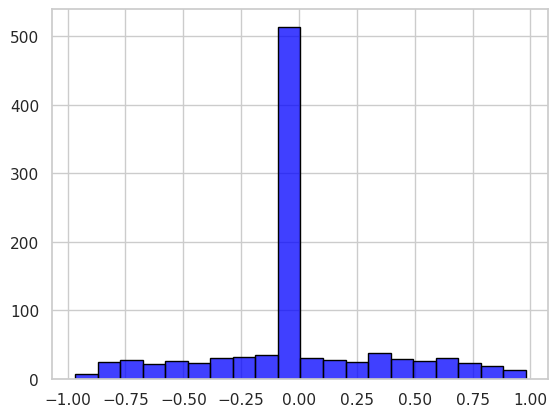

In [9]:
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
mu, sigma = 0, 1  # Mean and standard deviation for normal distribution
alpha, beta = 1.5, 1  # Shape and scale for Weibull distribution
u = 1.0  # Truncation point
n_samples = 1000  # Number of samples

# Helper functions for distributions
def generate_normal(mu, sigma, n):
    """Generates n samples from a normal distribution using the Box-Muller transform."""
    data = []
    for _ in range(n):
        # Generate two uniform random numbers between 0 and 1
        u1, u2 = random.random(), random.random()
        # Box-Muller transform to generate standard normal values
        z0 = (2 * u1 - 1) ** 0.5 * math.cos(2 * math.pi * u2)
        z1 = (2 * u1 - 1) ** 0.5 * math.sin(2 * math.pi * u2)
        # Scale by mean and standard deviation
        data.append(mu + z0 * sigma)
    return data

def generate_weibull(alpha, beta, n):
    """Generates n samples from a Weibull distribution."""
    data = []
    for _ in range(n):
        # Inverse transform sampling for Weibull
        u = random.random()
        data.append(beta * (-math.log(1 - u)) ** (1 / alpha))
    return data

# Censoring function
def censor_data(data, u):
    """Censors data at the truncation point u."""
    return [min(x.real if isinstance(x, complex) else x, u) for x in data]

# Generate samples
normal_data = generate_normal(mu, sigma, n_samples)
weibull_data = generate_weibull(alpha, beta, n_samples)

# Apply censoring
censored_normal_data = censor_data(normal_data, u)
censored_weibull_data = censor_data(weibull_data, u)

# Plot using Seaborn
def plot_seaborn_histogram(data, title):
    """Plots a histogram using Seaborn."""
    sns.histplot(data, kde=False, bins=20, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# Plot original and censored data for both distributions
print("Normal Distribution (Original)")
plot_seaborn_histogram(normal_data, title="Normal Distribution (Original)")

print("\nNormal Distribution (Censored)")
plot_seaborn_histogram(censored_normal_data, title="Normal Distribution (Censored)")

print("\nWeibull Distribution (Original)")
plot_seaborn_histogram(weibull_data, title="Weibull Distribution (Original)")

print("\nWeibull Distribution (Censored)")
plot_seaborn_histogram(censored_weibull_data, title="Weibull Distribution (Censored)")
